In [37]:
import pandas as pd
import numpy as np


In [38]:
from sklearn.datasets import load_iris

In [39]:
iris=load_iris()

In [40]:
feature=iris.data

In [41]:
target=iris.target

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.svm import SVC

In [44]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=0)

In [45]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        model=svm.fit(X_train,y_train)
        score=model.score(X_test,y_test)
        if (score>best_score):
            best_score=score
            best_param={"C":C,"gamma":gamma}
print("best score",best_score)
print("best parameters ",best_param)

best score 0.9736842105263158
best parameters  {'C': 100, 'gamma': 0.001}


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
best_sc=0
for C in [0.001,0.01,0.1,1,10,100]:
    logreg=LogisticRegression(C=C).fit(X_train,y_train)
    score=logreg.score(X_test,y_test)
    if (score>best_sc):
        best_sc=score
        best_C={"C":C}
print("best score :",best_sc)
print("best parameters :",best_C)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


best score : 0.9736842105263158
best parameters : {'C': 100}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

In [48]:
import mglearn

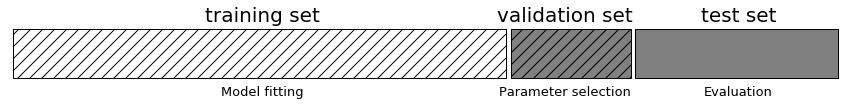

In [49]:
mglearn.plots.plot_threefold_split()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


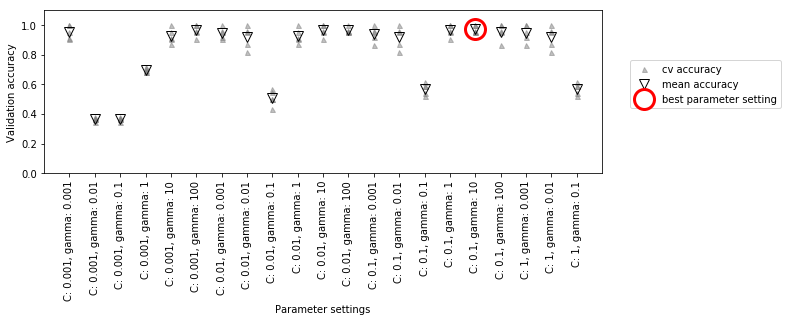

In [50]:
mglearn.plots.plot_cross_val_selection()

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid={"C":[0.001,0.01,0.1,1,10,100],"gamma":[0.001,0.01,0.1,1,10,100]}
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
print("best cross-validation score :",grid.best_score_)

best cross-validation score : 0.9732142857142857


In [54]:
print("best score :",grid.score(X_test,y_test))

best score : 0.9736842105263158


In [55]:
print("best parameters :",grid.best_params_)

best parameters : {'C': 100, 'gamma': 0.01}


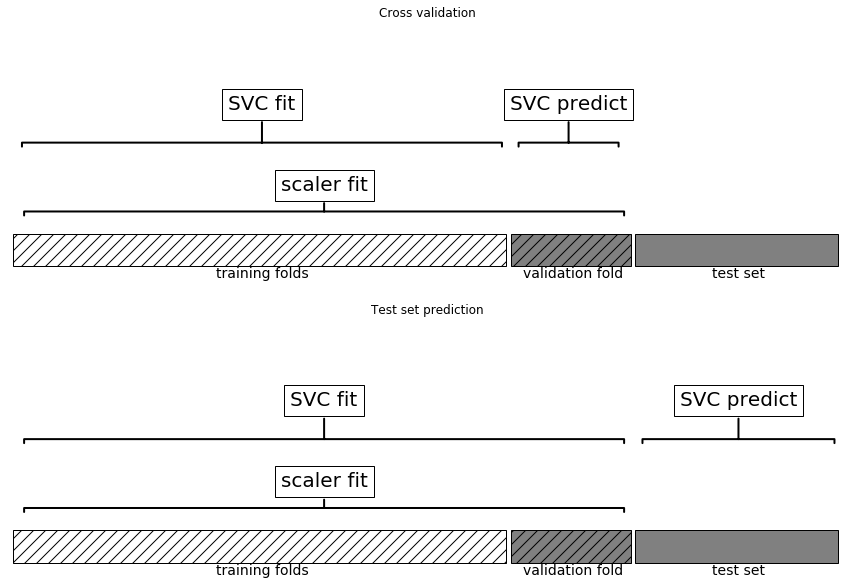

In [56]:
mglearn.plots.plot_improper_processing()

this is the reasoon why we use pipeline 

# Using the pipeline in Grid Search

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


In [58]:
pipe=Pipeline([("scaler",MinMaxScaler()),("svm",SVC())])

In [59]:
param_grid={"C":[0.001,0.01,0.1,1,10,100],"gamma":[0.001,0.01,0.1,1,10,100]}

In [60]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)

In [62]:
param_grid=[{"kernel":["rbf"],"C":[0.001,0.01,0.1,1,10,100],"gamma":[0.001,0.01,0.1,1,10,100]},
           {"kernel":["linear"],"C":[0.001,0.01,0.1,1,10,100]}]

In [63]:
grid_search=GridSearchCV(SVC(),param_grid=param_grid,n_jobs=-1,cv=5)

In [64]:
grid_search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
print("best parameters",grid_search.best_params_)

best parameters {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [67]:
print("best score",grid_search.best_score_)

best score 0.9732142857142857


In [69]:
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
pipe=Pipeline([("preprocessing",StandardScaler()),("classifier",SVC())])